<a href="https://colab.research.google.com/github/BrunaMoraisMenezesDSM/P1_analise_exploratoria_vinhos/blob/master/Bruna_Morais_Menezes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ATIVIDADE P1**

  ## Análise Exploratória de Dados

 ### **Nome:** Bruna Morais Menezes | **RA:** 1131392213017

  Links deste exercício:
  - https://www.kaggle.com/datasets/zynicide/wine-reviews
  - https://seaborn.pydata.org/
  - https://www.wine-searcher.com/critics-17-wine+enthusiast

  Fomos contratados por uma grande empresa distribuidora de vinhos. Nosso cliente deseja melhorar as vendas entregando produtos que agradem os diversos perfis de clientes. O foco do nosso projeto aqui é desenvolver uma análise exploratória nos [dados de avaliações de vinhos](https://www.kaggle.com/datasets/zynicide/wine-reviews).

  Uma análise exploratória bem elaborada consiste em algumas etapas:

  - Compreensão do negócio
  - Compreensão dos dados
  - Preparar os dados (limpeza e tratamento)
  - Análise de dados (extrair informações relevantes e responder perguntas)
  - Avaliação dos resultados

  Nosso objetivo ao concluir esse projeto é responder as seguintes perguntas:

  1. De onde vem o melhor vinho ?
  2. O preço do vinho está relacionado com a qualidade ?
  3. Certas variedades de uvas são de maior qualidade ?
  4. Qual é o melhor vinho em cada faixa de preço ?
  5. Que palavras são mais utilizadas para descrever um vinho ?

  Vamos começar!

## Verificando dados
Nesta etapa, vamos examinar os dados para responder as questões anteriores

**Importando bibliotecas**

Aqui estamos declarando as bibliotecas que serão utilizadas durante este exercício para análise de dados e visualização, e através da biblioteca Seaborn, que é baseada na Matplotlib, iremos definir um padrão com interface mais simples para gráficos.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

A seguir, vamos examinar o Dataset no qual criamos uma variável que irá armazenar o arquivo lido pela biblioteca `pandas`, utilizando a função `read_csv()`. Nesta variável passamos o caminho do arquivo temporário. Por fim, vamos exibir as primeiras cinco linhas deste DataFrame com `head()`.

In [3]:
df = pd.read_csv("/content/winemag-data-130k-v2.csv")
df.head()

Unnamed: 0   country                                        description  \
0           0     Italy  Aromas include tropical fruit, broom, brimston...   
1           1  Portugal  This is ripe and fruity, a wine that is smooth...   
2           2        US  Tart and snappy, the flavors of lime flesh and...   
3           3        US  Pineapple rind, lemon pith and orange blossom ...   
4           4        US  Much like the regular bottling from 2012, this...   

                          designation  points  price           province  \
0                        Vulkà Bianco      87    NaN  Sicily & Sardinia   
1                            Avidagos      87   15.0              Douro   
2                                 NaN      87   14.0             Oregon   
3                Reserve Late Harvest      87   13.0           Michigan   
4  Vintner's Reserve Wild Child Block      87   65.0             Oregon   

              region_1           region_2         taster_name  \
0                 Etna                NaN       Kerin O’Keefe   
1                  NaN                NaN          Roger Voss   
2    Willamette Valley  Willamette Valley        Paul Gregutt   
3  Lake Michigan Shore                NaN  Alexander Peartree   
4    Willamette Valley  Willamette Valley        Paul Gregutt   

  taster_twitter_handle                                              title  \
0          @kerinokeefe                  Nicosia 2013 Vulkà Bianco  (Etna)   
1            @vossroger      Quinta dos Avidagos 2011 Avidagos Red (Douro)   
2           @paulgwine       Rainstorm 2013 Pinot Gris (Willamette Valley)   
3                   NaN  St. Julian 2013 Reserve Late Harvest Riesling ...   
4           @paulgwine   Sweet Cheeks 2012 Vintner's Reserve Wild Child...   

          variety               winery  
0     White Blend              Nicosia  
1  Portuguese Red  Quinta dos Avidagos  
2      Pinot Gris            Rainstorm  
3        Riesling           St. Julian  
4      Pinot Noir         Sweet Cheeks

Abaixo, vamos exibir todos os nomes das colunas, usando o comando `columns`

---



In [4]:
df.columns

Index(['Unnamed: 0', 'country', 'description', 'designation', 'points',
       'price', 'province', 'region_1', 'region_2', 'taster_name',
       'taster_twitter_handle', 'title', 'variety', 'winery'],
      dtype='object')

Agora, vamos organizar um mapeamento das colunas, em que detalha o que cada uma delas armazena, para auxiliar na análise dos dados:

*  **unnamed** - parece uma coluna de indíce (pode ser removida)
*   **country** - país onde o vinho foi feito (informação relevante)
*   **description** - descrição do vinho
*   **designation** - vinhedo dentro da adega de onde as uvas que fizeram o vinho foram coletadas
*   **points** - refere-se ao número de pontos que o vinho obteve em sua avaliação, provavelmente, na escala de Wine Searcher
*   **price** - preço da garrafa de vinho
*   **province** - província ou estado onde o vinho foi feito
*   **region_1** - a região onde o vinho foi feito
*   **region_2** - região mais específica dentro de uma vitícola (pode ser removida)
*   **taster_name** - nome do revisor/avaliador do vinho
*   **taster_twitter_handle** - perfil do Twitter do revisor/avaliador
*   **title** - nome do vinho que foi analisado, incluindo o ano de fabricação
*   **variety** - tipo de uvas utilizadas na produção do vinho
*   **winery** - adega onde o vinho foi feito

A seguir, vamos obter uma visão geral do DataFrame criado com o método `info() `para analisarmos os tipos de dados, ressalto que também retorna quantos registros tem no DataFrame e se possui valores nulos.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             129971 non-null  int64  
 1   country                129908 non-null  object 
 2   description            129971 non-null  object 
 3   designation            92506 non-null   object 
 4   points                 129971 non-null  int64  
 5   price                  120975 non-null  float64
 6   province               129908 non-null  object 
 7   region_1               108724 non-null  object 
 8   region_2               50511 non-null   object 
 9   taster_name            103727 non-null  object 
 10  taster_twitter_handle  98758 non-null   object 
 11  title                  129971 non-null  object 
 12  variety                129970 non-null  object 
 13  winery                 129971 non-null  object 
dtypes: float64(1), int64(2), object(11)


No geral, o Dataset possui 129.971 linhas e 14 colunas, em que podemos remover algumas que possuem dados ausentes.

| Podemos entender que possui dados ausentes ao analisar a quantidade total de registros, comparadado a quantidade total de cada coluna. Por exemplo, a coluna `region_1` possui 108.724 registros, enquanto no total do Dataset, temos 129.971 linhas, assim, sabemos que há dados nulos.

Através do comando `describe`, podemos fazer uma pré-análise estatística que irá avaliar no DataFrame somente as colunas que possuem valores númericos, nos permitindo fazer correlações, por exemplo.

In [6]:
df.describe()

Unnamed: 0         points          price
count  129971.000000  129971.000000  120975.000000
mean    64985.000000      88.447138      35.363389
std     37519.540256       3.039730      41.022218
min         0.000000      80.000000       4.000000
25%     32492.500000      86.000000      17.000000
50%     64985.000000      88.000000      25.000000
75%     97477.500000      91.000000      42.000000
max    129970.000000     100.000000    3300.000000

Com base na análise descritiva anterior utilizando o `describe`, podemos observar que uma distribuição de pontos para uma garrafa de vinho, em que o mínimo é 80 e o máximo é 100, nota-se que a garrafa de vinho mais barata custa `$4` enquanto a mais cara, `$3.300`. Este [site](https://www.wine-searcher.com/critics-17-wine+enthusiast) fornece uma escala de pontuação da Wine Enthusiast, que está classificada como:

* **98–100** – Clássico
* **94–97** – Excelente
* **90–93** – Excelente
* **87–89** – Muito bom
* **83–86** – Bom
* **80–82** – Aceitável



Como um agrupamento, podemos contar quantos vinhos foram avaliados por cada país, usando um filtro na coluna `country` e a função `value_counts()`.

In [7]:
df["country"].value_counts()

country
US                        54504
France                    22093
Italy                     19540
Spain                      6645
Portugal                   5691
Chile                      4472
Argentina                  3800
Austria                    3345
Australia                  2329
Germany                    2165
New Zealand                1419
South Africa               1401
Israel                      505
Greece                      466
Canada                      257
Hungary                     146
Bulgaria                    141
Romania                     120
Uruguay                     109
Turkey                       90
Slovenia                     87
Georgia                      86
England                      74
Croatia                      73
Mexico                       70
Moldova                      59
Brazil                       52
Lebanon                      35
Morocco                      28
Peru                         16
Ukraine                      14
Serbia                       12
Czech Republic               12
Macedonia                    12
Cyprus                       11
India                         9
Switzerland                   7
Luxembourg                    6
Bosnia and Herzegovina        2
Armenia                       2
Slovakia                      1
China                         1
Egypt                         1
Name: count, dtype: int64

Como resultado deste agrupamento, pode-se notar que a maioria dos vinhos
avaliados são dos EUA, França, Itália, Espanha e Portugual.



---



Podemos utilizar a mesma função acima,  `value_counts()`, para fazer uma contagem, filtrando a coluna `variety`, assim podemos saber quais os tipos de uva foram mais utilizadas na fabricação dos vinhos avaliados:

In [8]:
df["variety"].value_counts()

variety
Pinot Noir                    13272
Chardonnay                    11753
Cabernet Sauvignon             9472
Red Blend                      8946
Bordeaux-style Red Blend       6915
                              ...  
Cabernet Sauvignon-Barbera        1
Sauvignonasse                     1
Forcallà                          1
Meseguera                         1
Bobal-Cabernet Sauvignon          1
Name: count, Length: 707, dtype: int64

Na próxima fase, iremos realizar a limpeza de dados, pois como vimos anteriormente, alguns campos podem ser descartados, afinal, não serão úteis para nossa análise. São eles: `unnamed: 0, designation, region_1, region_2, taster_name e taster_twitter_handle`

## Limpeza dos dados

A fim de segurança, a primeira coisa a ser feita no processo de limpeza dos dados, é a cópia do DataFrame usando a função `copy()` e atribuímos a uma nova variável, pois se perdermos algo, conseguimos recuperar rapidamente.

In [9]:
df1 = df.copy()

Para termos um DataFrame mais compacto, podemos remover as colunas que não serão utilizadas na nossa análise, usando a função `drop()` no novo DataFrame (a cópia), trabalhando no eixo 1 `(axis=1)`, ou seja, apagando toda a coluna do DataFrame. Em seguida, verificamos os primeiros registros.

In [10]:
df1 = df1.drop(["Unnamed: 0", "designation", "region_1", "region_2", "taster_name", "taster_twitter_handle"], axis=1)
df1.head()

country                                        description  points  price  \
0     Italy  Aromas include tropical fruit, broom, brimston...      87    NaN   
1  Portugal  This is ripe and fruity, a wine that is smooth...      87   15.0   
2        US  Tart and snappy, the flavors of lime flesh and...      87   14.0   
3        US  Pineapple rind, lemon pith and orange blossom ...      87   13.0   
4        US  Much like the regular bottling from 2012, this...      87   65.0   

            province                                              title  \
0  Sicily & Sardinia                  Nicosia 2013 Vulkà Bianco  (Etna)   
1              Douro      Quinta dos Avidagos 2011 Avidagos Red (Douro)   
2             Oregon      Rainstorm 2013 Pinot Gris (Willamette Valley)   
3           Michigan  St. Julian 2013 Reserve Late Harvest Riesling ...   
4             Oregon  Sweet Cheeks 2012 Vintner's Reserve Wild Child...   

          variety               winery  
0     White Blend              Nicosia  
1  Portuguese Red  Quinta dos Avidagos  
2      Pinot Gris            Rainstorm  
3        Riesling           St. Julian  
4      Pinot Noir         Sweet Cheeks

Verificando os dados ausentes que precisam ser resolvidos:

In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   country      129908 non-null  object 
 1   description  129971 non-null  object 
 2   points       129971 non-null  int64  
 3   price        120975 non-null  float64
 4   province     129908 non-null  object 
 5   title        129971 non-null  object 
 6   variety      129970 non-null  object 
 7   winery       129971 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 7.9+ MB


Podemos analisar que agora temos 8 colunas, porém algumas apresentam dados ausentes.

Consultando o tamanho da base de dados usando o comando `shape`:

In [12]:
df1.shape

(129971, 8)

Como resultado, o primeiro valor refere-se a quantidade de registros, sendo 129.971 e o segundo, a quantidade de colunas, no caso 8.

---

Podemos questionar qual a porcentagem que vai ficar de dados, caso eu remova todos os registros que tem dados ausentes, e a resposta, baseia-se em alguns cálculos de proporção na coluna, no caso, pegaremos a de preço, faremos uma contagem de valores utilizando a função `count()` e vamos dividir pelo tamanho da base de dados, através do `shape[0]` para pegar a quantidade de registros. Por fim, exibiremos em formato de porcentagem.

In [13]:
print("{:.0%}".format(df1["price"].count() / df1.shape[0]))

93%


Com o valor obtido acima, conclui-se que mesmo apagando todos os registros em branco da coluna `price`, ainda ficaremos com 93% de todos os registros. Sendo assim, vamos seguir removendo os valores nulos das colunas `country` e `variety`. Será feito através da função `dropna()` que remove linhas do DataFrame que contêm valores ausentes, e passamos dentro do `subset[]` quais são as colunas que queremos remover estes dados ausentes, portanto, removeremos apenas os registros, a coluna permanece. No final, exibiremos um resumo do DataFrame.

In [14]:
df1 = df1. dropna(subset=["country", "price","variety"])
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 120915 entries, 1 to 129970
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   country      120915 non-null  object 
 1   description  120915 non-null  object 
 2   points       120915 non-null  int64  
 3   price        120915 non-null  float64
 4   province     120915 non-null  object 
 5   title        120915 non-null  object 
 6   variety      120915 non-null  object 
 7   winery       120915 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 8.3+ MB


Nota-se que agora todas as colunas não possuem mais dados ausentes. Portanto, o DataFrame está pronto para a próxima etapa de Análise Exploratória.

## Análise Exploratória

Para esta etapa, de início, é sempre recomendado visualizar os dados. Agora, iremos observar a distribuição dos pontos nas avaliações dos vinhos.

Abaixo, vamos plotar um gráfico baseado o `df1`, definindo o tamanho da figura. Vamos criar um histograma para entender melhor a distribuição dos pontos, utilizando a coluna `points` no eixo x. Os dados serão distribuídos de 80 até o ponto máximo +1, garantindo que não vamos perder a pontuação máxima. Também vamos definir que a concentração dos dados será em intervalos de um em um e a cor do gráfico será laranja.

Depois iremos definir a faixa de pontuação do eixo x, que será de 80 até 100, o título do gráfico e também os rótulos dos eixos x e y.

Text(0, 0.5, 'Frequência')

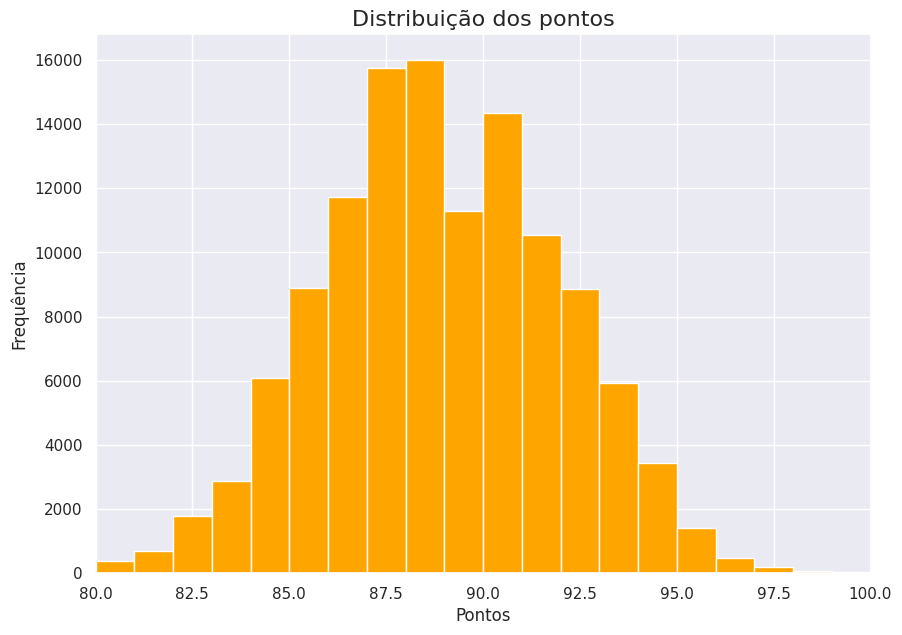

In [43]:
plt.figure(figsize=(10, 7))
plt.hist(data=df1, x='points',
         bins=np.arange (80, df1['points'].max()+1, 1),
         color = 'orange')
plt.xlim(80,100)
plt.title('Distribuição dos pontos', fontsize=16)
plt.xlabel('Pontos')
plt.ylabel('Frequência')

Com base no histograma, podemos observar que existe uma distribuição quase normal dos pontos numa escala de 80 a 100.


---


Em seguida, veremos quais países estão no Top 10 na produção de vinhos. Para isso, criaremos uma variável chamada `country_top_10`, que armazenará o resultado da seleção de dados da coluna `country` do DataFrame `df1`. Após, todos os valores dessa coluna serão contados utilizando a função `value_counts()`, e os 10 primeiros serão selecionados com `[:10]`.

In [16]:
country_top_10 = df1["country"].value_counts()[:10]
country_top_10

country
US           54265
France       17776
Italy        16914
Spain         6573
Portugal      4875
Chile         4415
Argentina     3756
Austria       2799
Australia     2294
Germany       2120
Name: count, dtype: int64

Com base no filtro dos Top 10 acima, podemos gerar um gráfico de barras com os mesmos dados para que possamos ver a classificação de vinhos por país.

Esse processo será feito definindo o tamanho da figura e com base na variável `country_top_10` vamos criar um gráfico do tipo barras com a cor laranja. Depois iremos definir o título do gráfico e também os rótulos dos eixos x e y.

Text(0, 0.5, 'Total de avaliações')

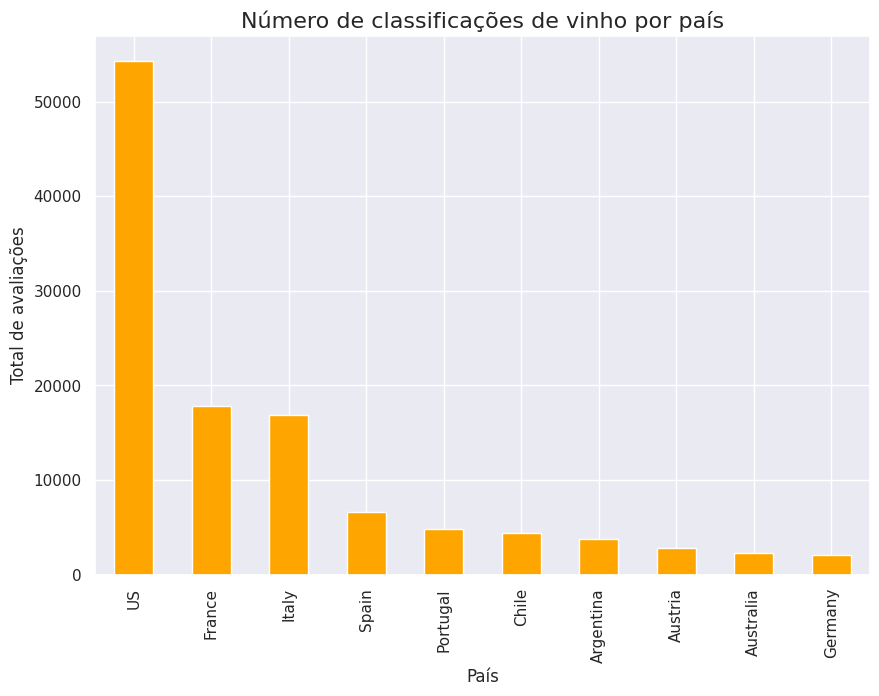

In [44]:
plt.figure(figsize=(10, 7))
country_top_10.plot(kind='bar', color = 'orange')
plt.title('Número de classificações de vinho por país', fontsize = 16)
plt.xlabel('País')
plt.ylabel('Total de avaliações')

Com base no gráfico acima, podemos realizar alguns agrupamentos para investigar quantos países produzem vinho de melhor qualidade, baseados nas classificações.

No caso, abaixo estamos agrupando os países `groupby("country")` por pontos `['points']` e calculando a média `agg('mean')` e o resultado está sendo armazenado na variável `melhor_qualidade`. Em seguida, estamos ordenando os valores para que eles fiquem em ordem decrescente, utilizando o `sort_values(ascending=False)` e filtrando os 10 mais, com `[:10]`.

Precisamos converter estes dados em uma Serie, usando o método `to_frame()` que vai realizar a conversão para a Serie. Assim, a visualização se torna mais fácil, pois é possível observar a variação dos dados devido a intensidade da cor laranja aplicado sobre eles.

In [18]:
melhor_qualidade = df1.groupby("country")['points'].agg("mean")
melhor_qualidade = melhor_qualidade.sort_values(ascending=False)[:10]

# Convertendo em uma Serie
melhor_qualidade.to_frame().style.background_gradient(cmap='Oranges',high=0.5)

Baseado na Serie apresentada acima, podemos gerar um gráfico de barras. Para isso, vamos criar variáveis `y` para armazenar os índices da Serie `melhor_qualidade` representando os países, e a variável `x` para os valores da Serie que são as médias de pontos dos vinhos. Configuramos o tamanho da figura, os limites do eixo x entre 80 e 92 e a cor, no caso, laranja. Por fim, adicionamos títulos e rótulos.

<ipython-input-19-3aa11e6160cb>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x, y=y, palette = 'Oranges_r')


Text(0, 0.5, 'País')

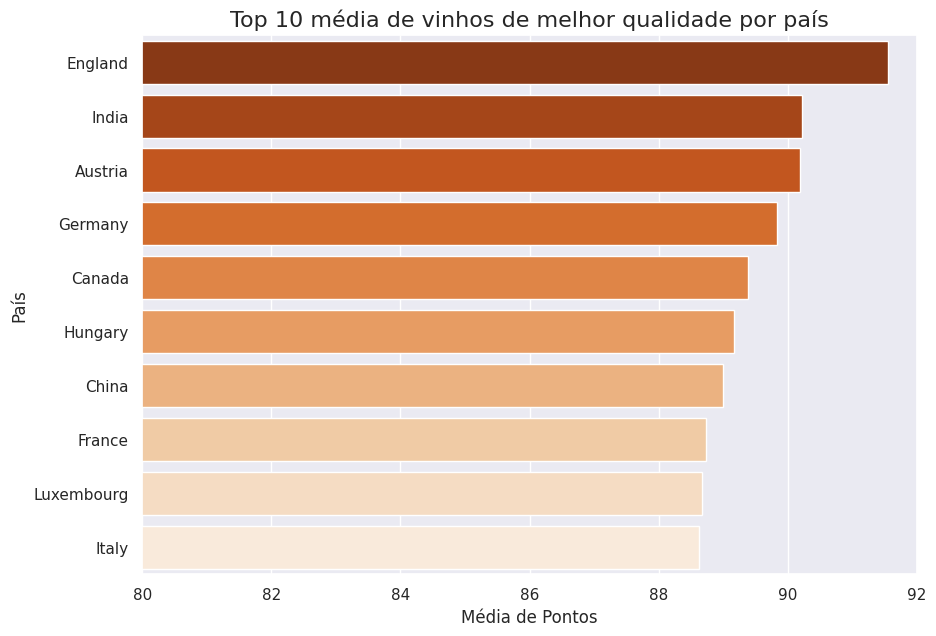

In [19]:
y = melhor_qualidade.index.to_series()
x = melhor_qualidade

plt.figure(figsize=(10, 7))
plt.xlim(80, 92)
sns.barplot(x=x, y=y, palette = 'Oranges_r')
plt.title('Top 10 média de vinhos de melhor qualidade por país', fontsize = 16)
plt.xlabel('Média de Pontos')
plt.ylabel('País')

Quando verificamos a média de pontos, percebe-se que o país que produziu o vinho de melhor qualidade, ou seja, com a melhor avalição, foi a Inglaterra. Agora, iremos analisar se isso ocorre por ter menos vinhos da Inglaterra com pontuação alta no DataFrame, pois isso aumentaria a média. Vamos olhar os países com pontuação máxima acima de 95, que são os vinhos excelentes.

Portanto, abaixo estamos fazendo um filtro na coluna `points` do `df1` para pegar os vinhos com pontuação mais alta, ou seja, acima de `>= 95` e vamos atribuir a uma variável chamada `high_scores` que posteriormente, realizará uma contagem em cima destes registros, usando o `value_counts()`.

In [20]:
high_scores = df1[df1["points"] >= 95]
high_scores["country"].value_counts()

country
US              991
France          509
Italy           326
Austria         103
Portugal         96
Germany          62
Spain            51
Australia        47
Argentina        11
Hungary           5
England           3
South Africa      3
Chile             2
New Zealand       2
Name: count, dtype: int64

Percebe-se que os países com classificações entre 95 e 100 pontos diferem das pontuações médias em nosso gráfico. Sendo assim, podemos criar um boxplot para visualizar o máximo, mínimo e a média das pontuações por país. Pois, parece uma comparação injusta, visto que a base de dados contém mais vinhos dos EUA, o que indica maior variedade, enquanto a Inglaterra, que teve a melhor pontuação média, tem menos vinhos registrados. Portanto, entende-se que a diferença na quantidade de vinhos avaliados entre os países, podem afetar a análise das pontuações e o boxplot ajudaria fornecendo uma melhor visualização.

Para criar o boxplot, vamos pegar dados do DataFrame `df1`, no eixo x ficarão os dados da coluna `points`, enquanto no y ficarão os dados da coluna `country`. Ele será laranja com título e rótulo nos eixos.

Text(0, 0.5, 'País')

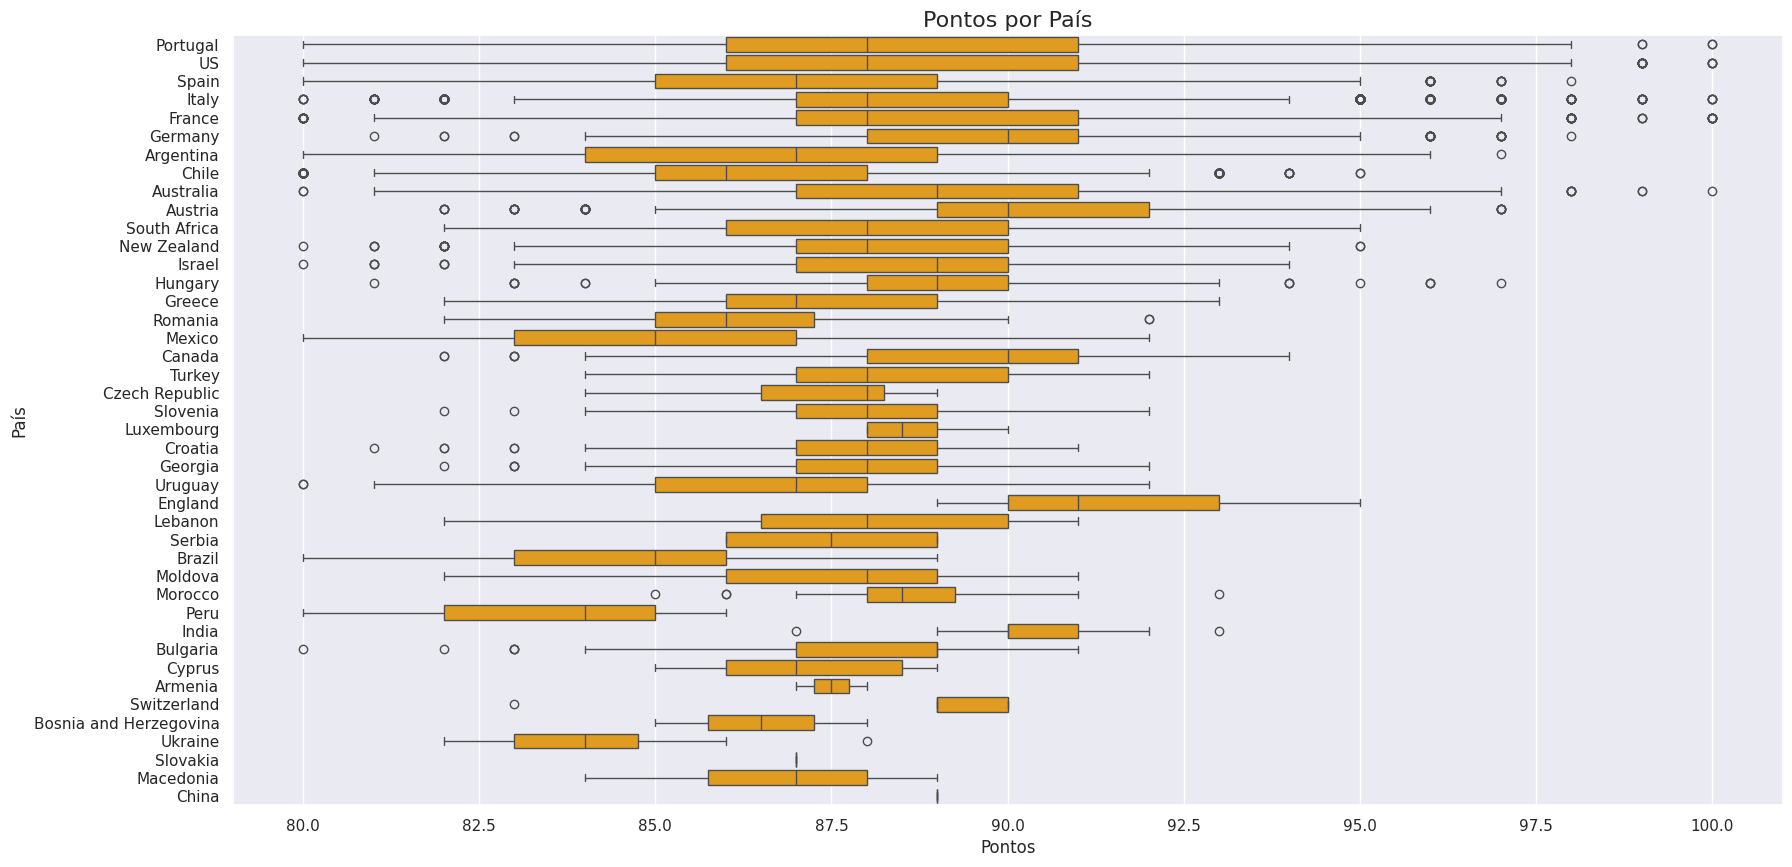

In [21]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=df1, x='points', y='country', color='Orange')
plt.title('Pontos por País', fontsize = 16)
plt.xlabel('Pontos')
plt.ylabel('País')

| **Observação:** O risco preto em cada um dos BoxPlot representa a média de vinhos.

Percebe-se que embora os vinhos da Inglaterra tenham a média de pontos mais alta, países como Portugal, EUA, Itália, França e Austrália também alcançaram uma pontuação perfeita de 100 devido a uma quantidade maior de vinhos desses países na base de dados, obtendo uma maior variedade de pontuações.


---

Agora vamos examinar o preço do vinhos nos países criando um gráfico BarPlot.

O código abaixo calcula o preço médio da garrafa de vinho por país a partir do DataFrame `df1`, agrupando os dados pela coluna `country` e obtendo a média através do método `mean()` usando a coluna `price`, o resultado é armazenado na variável `average_price`, que em seguida, classifica os resultados em ordem decrescente usando o `sort_values(ascending=False)`. Após, definimos o tamanho da figura para gerar um gráfico de barras, em tons de laranja, exibindo os preços médios no eixo x e os países no eixo y.

<ipython-input-22-d7e549151633>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x, y=y, palette='Oranges_r')


Text(0, 0.5, 'País')

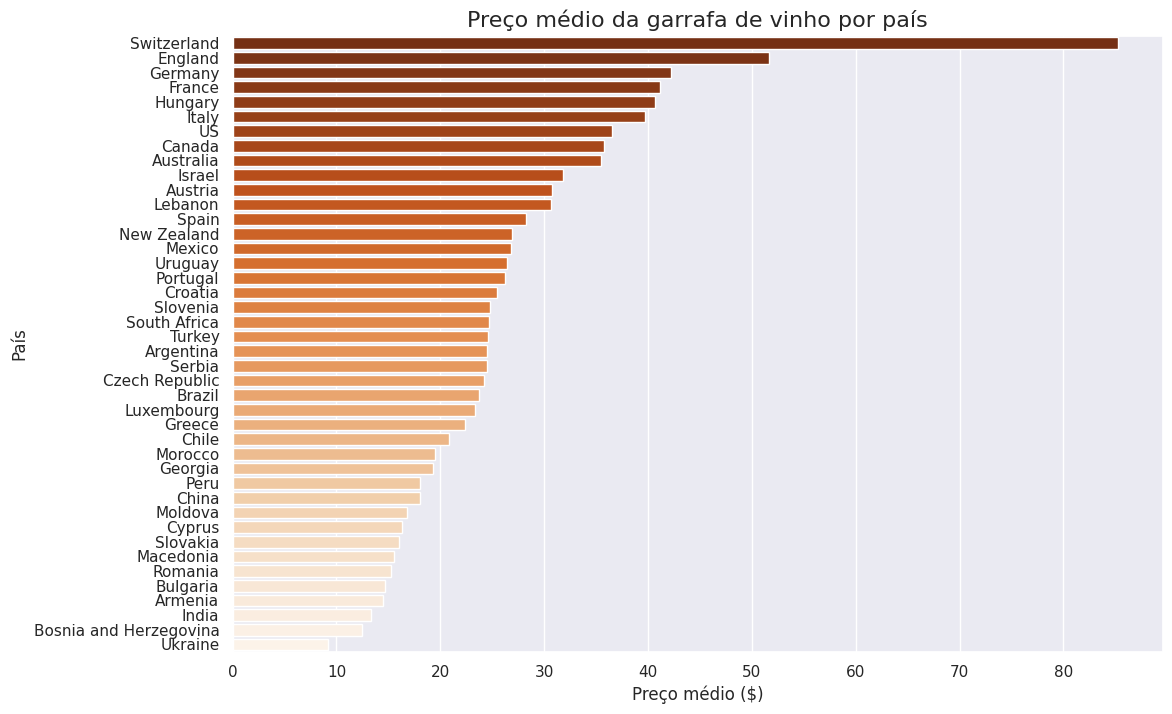

In [22]:
average_price = df1.groupby("country")['price'].mean()
average_price = average_price.sort_values(ascending=False)
y = average_price.index.to_series()
x = average_price.values

plt.figure(figsize=(12, 8))
sns.barplot(x=x, y=y, palette='Oranges_r')
plt.title('Preço médio da garrafa de vinho por país', fontsize = 16)
plt.xlabel('Preço médio ($)')
plt.ylabel('País')

Analisando o gráfico acima, a Suíça produz o vinho com preço médio da garrafa de mais de `$80`, sendo o mais caro. Enquanto na Ucrânia, o preço está bem baixo, sendo `$10` a garrafa. A próxima etapa será para analisar se o preço tem relação com a qualidade do vinho, para isso vamos utilizar histogramas.

O código a seguir define o tamanho da figura, em seguida, a variável `bins` armazena um array de números que inicia em 0 até o preço máximo na coluna `price` + 5 para garantir que todos os dados sejam incluídos, tendo um intervalo de 5 em 5. Depois, um histograma laranja é plotado, com o eixo x sendo a coluna `price`, com os limites de 0 a 200. Este recebe um título e rótulo para os eixos.

Text(0, 0.5, 'Frequência')

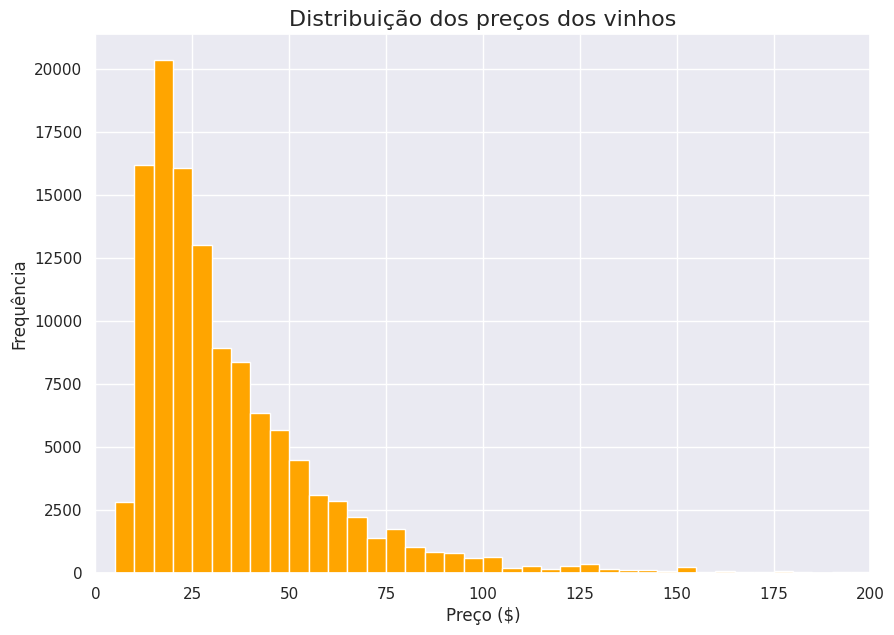

In [23]:
plt.figure(figsize=(10, 7))
bins = np.arange(0, df1["price"].max() + 5, 5)
plt.hist(data=df1, x='price', bins=bins, color = 'Orange')
plt.xlim(0, 200)
plt.title('Distribuição dos preços dos vinhos', fontsize = 16)
plt.xlabel('Preço ($)')
plt.ylabel('Frequência')

Devido os dados estarem muito voltados para a esquerda do gráfico, recomenda-se que haja uma transforção logarítmica nos dados, a fim de deixá-lo mais próximo de uma distribuição normal.



---

Abaixo está o DataFrame com a distribuição normal, fazendo um `describe` na coluna de `price`.

In [24]:
df1['price'].describe()

count    120915.000000
mean         35.368796
std          41.031188
min           4.000000
25%          17.000000
50%          25.000000
75%          42.000000
max        3300.000000
Name: price, dtype: float64

Transformando o resultado anterior em uma distribuição logarítmica, através de uma função da biblioteca NumPy, `log10` que vai calcular o logaritmo na base 10 da coluna `price` do DataFrame `df1`.

In [25]:
np.log10(df1["price"].describe())

count    5.082480
mean     1.548620
std      1.613114
min      0.602060
25%      1.230449
50%      1.397940
75%      1.623249
max      3.518514
Name: price, dtype: float64

Percebe-se com o resultado acima que a distribuição está mais normalizada. Portanto, vamos transformar em um histograma usando uma distribuição logarítmica no eixo x.



Text(0, 0.5, 'Frequência')

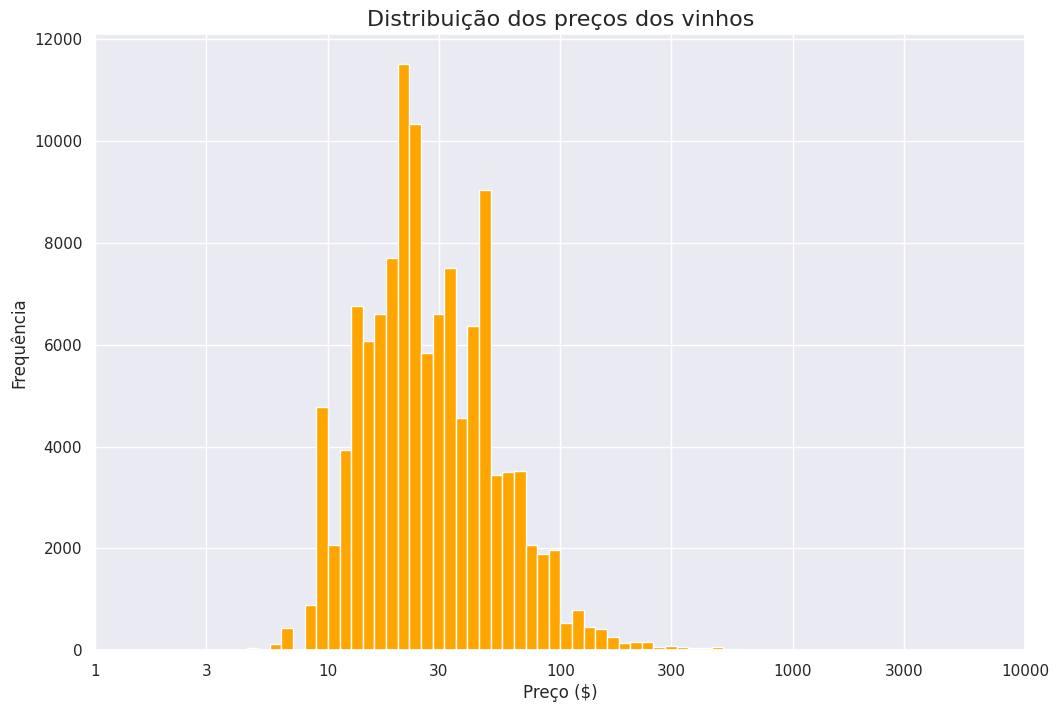

In [26]:
plt.figure(figsize=(12, 8))
bins = 10 ** np.arange(0.5, 3.5 + 0.05, 0.05)
ticks = [1, 3, 10, 30, 100, 300, 1000, 3000, 10000]
plt.hist(data=df1, x='price', bins=bins, color ='Orange')
plt.title('Distribuição dos preços dos vinhos', fontsize=16)
plt.xscale('log')
plt.xticks(ticks,ticks)
plt.xlabel('Preço ($)')
plt.ylabel('Frequência')

Agora temos uma distruição quase normal, mesmo que existam alguns saltos na região dos 10, 20 e 50 dólares. Podemos plotar um novo gráfico do tipo scatter para analisarmos se tem alguma correlação entre a pontuação e o valor da garrafa.

Sendo assim, serão criados alguns pontos, definido o tamanho da figura e o gráfico será plotado utilizando a coluna `price` para o eixo x e `points` para o y.

Text(0, 0.5, 'Pontos')

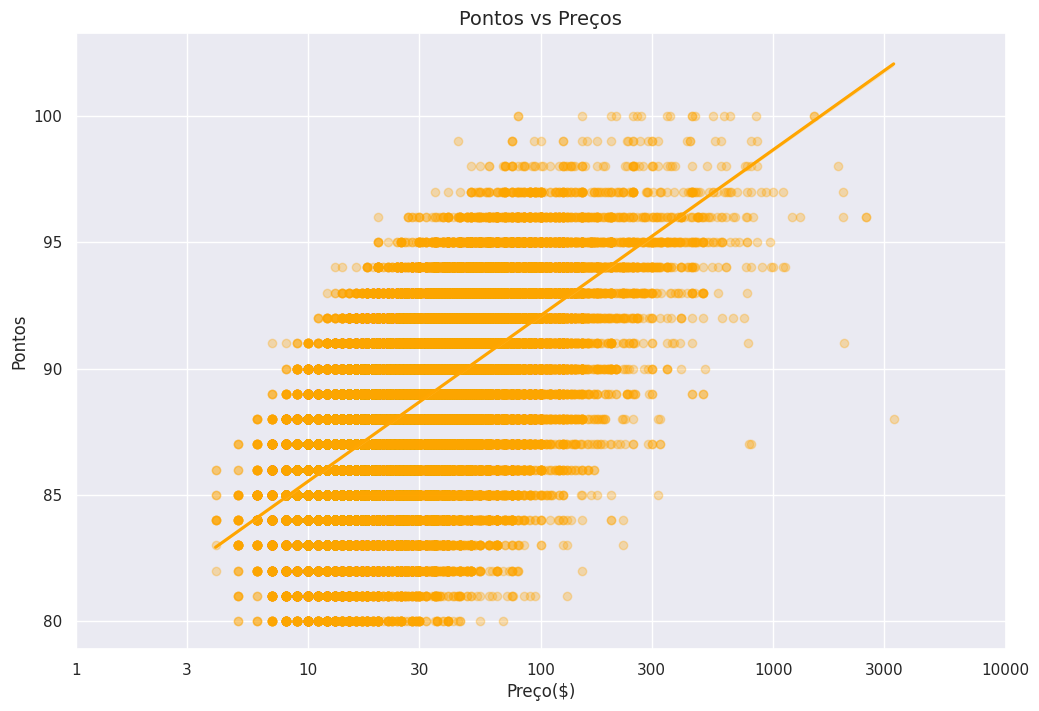

In [27]:
x = [1, 3, 10, 30, 100, 300, 1000, 3000, 10000]

plt.figure(figsize=(12, 8))
sns.regplot(x='price', y='points', data=df1, color='Orange', logx=True, scatter_kws={'alpha':0.3})
plt.title('Pontos vs Preços', fontsize=14)
plt.xscale('log')
plt.xticks(x, x)
plt.xlabel('Preço($)')
plt.ylabel('Pontos')

No gráfico acima, conseguimos observar que conforme a quantidade de pontos vai crescendo, o preço - representado pela linha, também aumenta. Sendo assim, tem uma relação muito forte, positiva entre as variáveis pontuação e preços, portanto, podemos concluir que vinhos mais caros, pendem a receber melhores avaliações.
Também é notável que tem dois pontos longes na região dos 4 e 3000 dólares, então, podemos listar para saber dentre esses vinhos, qual o de menor e maior preço.

Sendo assim, abaixo estamos fazendo um filtro na coluna `price` do DataFrame `df1`, pegando apenas um registro `[:1]` com o valor mínimo usando a função `min() ` . O mesmo ocorre para o máximo, substintuindo a função por `max()`.

In [28]:
df1[df1['price'] == df1['price'].min()][:1]

country                                        description  points  \
1987   Spain  Berry and cherry aromas are surprisingly sturd...      85   

      price       province                                              title  \
1987    4.0  Central Spain  Felix Solis 2013 Flirty Bird Syrah (Vino de la...   

     variety       winery  
1987   Syrah  Felix Solis

In [29]:
df1[df1['price'] == df1['price'].max()][:1]

country                                        description  points  \
80290  France  This ripe wine shows plenty of blackberry frui...      88   

        price  province                                 title  \
80290  3300.0  Bordeaux  Château les Ormes Sorbet 2013  Médoc   

                        variety                    winery  
80290  Bordeaux-style Red Blend  Château les Ormes Sorbet

Mesmo com a diferença explícita de preço entre os dois vinhos, a pontuação é bem próxima, com apenas 3 pontos de diferença. Isso nos leva a pensar se existem tipos de uva de melhor qualidade, para isso, vamos fazer um filtro na coluna `variety` pegando uma amostra de 20 melhores vinhos e realizando uma constagem sobre ela com `value_counts()[:20]`

In [30]:
df1['variety'].value_counts()[:20]

variety
Pinot Noir                  12785
Chardonnay                  11077
Cabernet Sauvignon           9384
Red Blend                    8466
Bordeaux-style Red Blend     5340
Riesling                     4971
Sauvignon Blanc              4780
Syrah                        4086
Rosé                         3261
Merlot                       3061
Zinfandel                    2708
Malbec                       2593
Sangiovese                   2377
Nebbiolo                     2331
Portuguese Red               2196
White Blend                  2167
Sparkling Blend              2027
Tempranillo                  1788
Rhône-style Red Blend        1404
Pinot Gris                   1388
Name: count, dtype: int64

Vamos plotar um BoxPlot com os dados acima. Como fizemos anteriormente, definimos o tamanho da figura, o DataFrame que será utilizado e quais colunas estarão nos eixos x e y, sendo respectivamente, `variety` e `points`. Também definimos a cor laranja e a seleção das 20 variedades mais recorrentes.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'Pinot Noir'),
  Text(1, 0, 'Chardonnay'),
  Text(2, 0, 'Cabernet Sauvignon'),
  Text(3, 0, 'Red Blend'),
  Text(4, 0, 'Bordeaux-style Red Blend'),
  Text(5, 0, 'Riesling'),
  Text(6, 0, 'Sauvignon Blanc'),
  Text(7, 0, 'Syrah'),
  Text(8, 0, 'Rosé'),
  Text(9, 0, 'Merlot'),
  Text(10, 0, 'Zinfandel'),
  Text(11, 0, 'Malbec'),
  Text(12, 0, 'Sangiovese'),
  Text(13, 0, 'Nebbiolo'),
  Text(14, 0, 'Portuguese Red'),
  Text(15, 0, 'White Blend'),
  Text(16, 0, 'Sparkling Blend'),
  Text(17, 0, 'Tempranillo'),
  Text(18, 0, 'Rhône-style Red Blend'),
  Text(19, 0, 'Pinot Gris')])

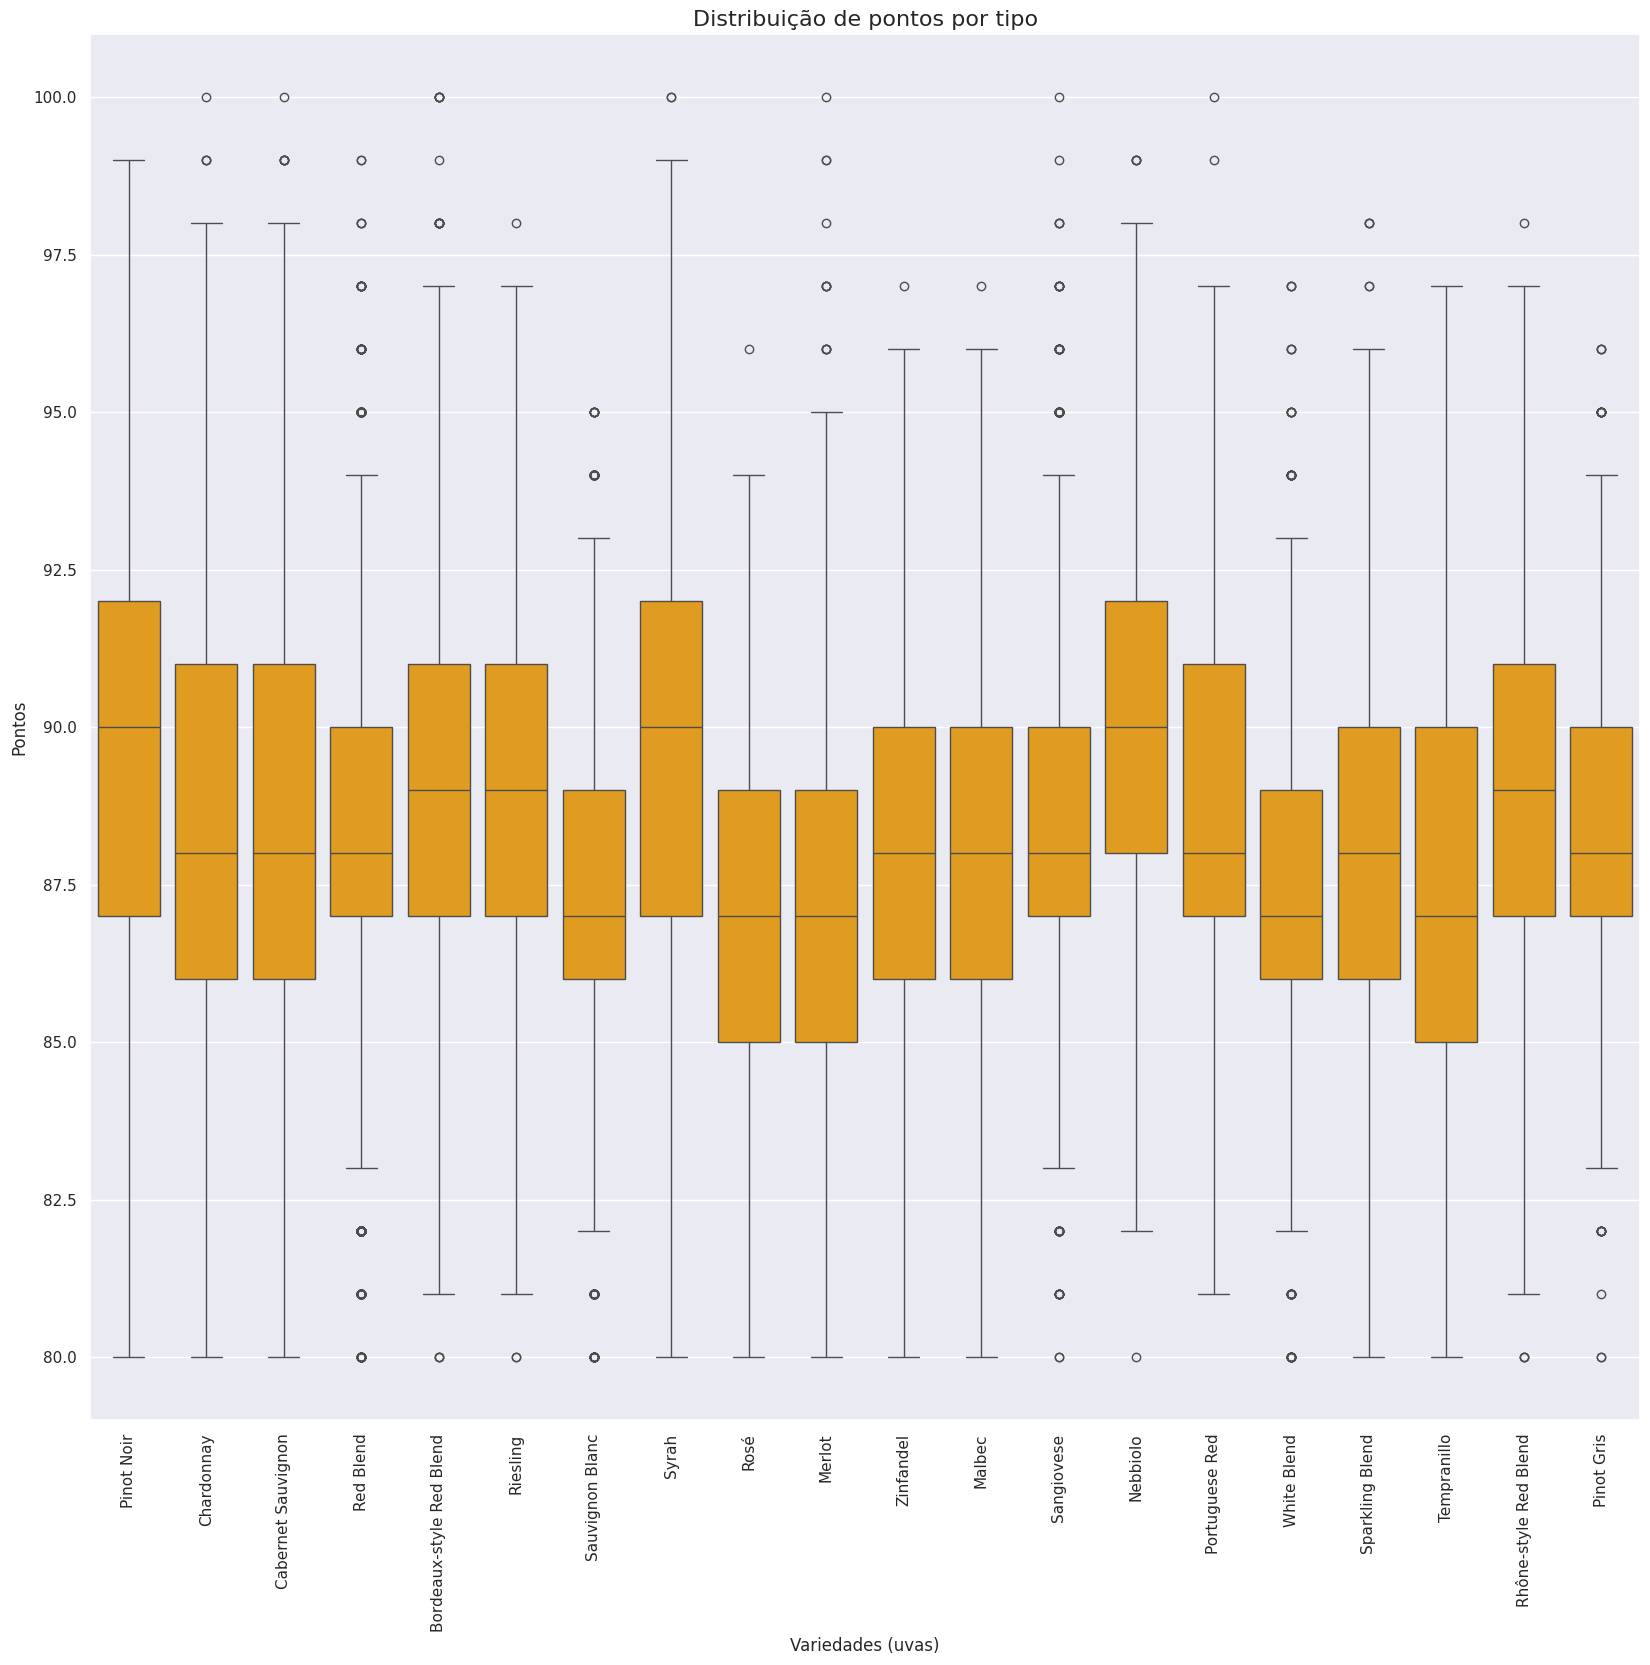

In [31]:
plt.figure(figsize=(20, 18))
sns.boxplot(data=df1,
            x='variety',
            y='points',
            color='Orange',
            order=df1["variety"].value_counts().iloc[:20].index)

plt.title('Distribuição de pontos por tipo', fontsize=16)
plt.xlabel('Variedades (uvas)')
plt.ylabel('Pontos')
plt.xticks(rotation=90)

De acordo com o Top 20 de melhores vinhos, o tipo de uva Pinot Noir volta-se a ter a pontuação média mais alta. Portanto, já sabemos que a qualidade está relacionado ao preço, agora precisamos descobrir qual o melhor custo-benefício nas seguintes faixas de preço:

* Até `$15`

* Entre `$15` e `$30`

* Entre `$30` e `$50`

* Acima de `$50`



---

No Top 10 Custando até 15 dólares, vamos atribuir a uma variável o DataFrame com as colunas `description`, `province` e `winery` removidas. Logo após, vamos filtrar através da coluna `price` valores abaixo ou igual a 15, ordenando-os de forma decrescente e obtendo apenas os 10 primeiros e, por fim adicionamos um estilo.

In [33]:
# Até $15
under_15 = df1.drop(["description","province","winery"], axis=1)
under_15 = under_15[under_15["price"] <= 15]
under_15 = under_15.sort_values(by="points", ascending=False)[:10]
under_15.style.background_gradient(cmap='YlOrRd', high= 0.5, subset=['price'])

Analisando os dados, o vinho de Portugal **"Quinta dos Murças 2011 Assobio Red (Douro)"** é barato, custando apenas 13 dólares e possui uma pontuação de 94 pontos, sendo uma boa escolha.

---

A seguir, será apresentado o DataFrame com Top 10 de vinhos entre 15 e 30 dólares, seguindo o mesmo formato do anterior.

In [34]:
# Entre $15 e $30
between_15_and_30 = df1.drop(["description", "province", "winery"], axis=1)
between_15_and_30 = between_15_and_30.query("price > 15 and price <= 30")
between_15_and_30 = between_15_and_30.sort_values(by="points", ascending=False)[:10]
between_15_and_30.style.background_gradient(cmap='YlOrRd', high= 0.5, subset=['price'])

Neste caso, o o vinho dos EUA **"Rulo 2007 Syrah (Columbia Valley (WA))"** custa 20 dólares e possui uma pontuação de 96 pontos, tendo o melhor custo benefício.

---

A seguir, será apresentado o DataFrame com Top 10 de vinhos entre 30 e 50 dólares:

In [35]:
# Entre $30 e $50
between_30_and_50 = df1.drop(["description", "province", "winery"], axis=1)
between_30_and_50 = between_30_and_50.query("price > 30 and price <= 50")
between_30_and_50 = between_30_and_50.sort_values(by="points", ascending=False)[:10]
between_30_and_50.style.background_gradient(cmap='YlOrRd', high= 0.5, subset=['price'])

Neste tópico, novamente o vinho do EUA **"Failla 2010 Estate Vineyard Chardonnay (Sonoma Coast)	"** se torna uma boa escolha, por custar 44 dólares com pontuação de 99.

---

A seguir, será apresentado o DataFrame com Top 10 de vinhos acima de 50 dólares:

In [36]:
# Acima de $50
above_50 = df1.drop(["description", "province", "winery"], axis=1)
above_50 = above_50.query("price > 50")
above_50 = above_50.sort_values(by="points", ascending=False)[:10]
above_50.style.background_gradient(cmap='YlOrRd', high= 0.5, subset=['price'])

Mais dois vinhos americanos com a pontuação máxima de 100 pontos, custando 80 dólares, seus nomes são **"Charles Smith 2006 Royal City Syrah (Columbia Valley (WA))"** e **"Cayuse 2008 Bionic Frog Syrah (Walla Walla Valley (WA))"**.

Com base no campo `description`, podemos criar uma nuvem de palavras utilizando a biblioteca `wordcloud`, para podermos descobrir quais são as palavras mais utilizadas para descrevê-los. Essa biblioteca vai separar cada palavra de um texto, nos permitindo filtrar pela ocorrência.


---


Abaixo vamos importar a biblioteca supracitada e conciliar todas as descrições em um único texto, através do `join()` separando cada uma por um espaço. Depois, calcula e retorna o comprimento do texto, usando o `len()` e passando a variável `text`.

In [37]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS

text = df1["description"][1]
text = " ".join(i for i in df1["description"])
len(text)

29653210

Retornou a quantidade de 29.653.210 palavras, por isso vamos usar a biblioteca `stopwords` para retirarmos algumas palavras que não nos interessam, no caso: `"drink","now","wine","flavor" e "flavors"`. Depois, o `WordCloud` vai gerar a nuvem de palavras a partir do texto.



In [38]:
from logging.config import stopListening
stopwords = set(STOPWORDS)
stopwords.update(["drink","now","wine","flavor","flavors"])
wordcloud = WordCloud(stopwords=stopwords,
                     background_color="white",
                     width=2048,
                     height=1024,
                     max_words=1000).generate(text)

Acima, concluiu a contagem de palavras, ou seja, a nuvem de palavras está pronta, agora precisamos plotar uma imagem para mostrar as palavras mais utilizadas na coluna `description`.

Abaixo vamos configurar o tamanho da figura e utilizar o `Matplotlib` para exibir a nuvem de palavras gerada sem a exibição dos eixos.

(-0.5, 2047.5, 1023.5, -0.5)

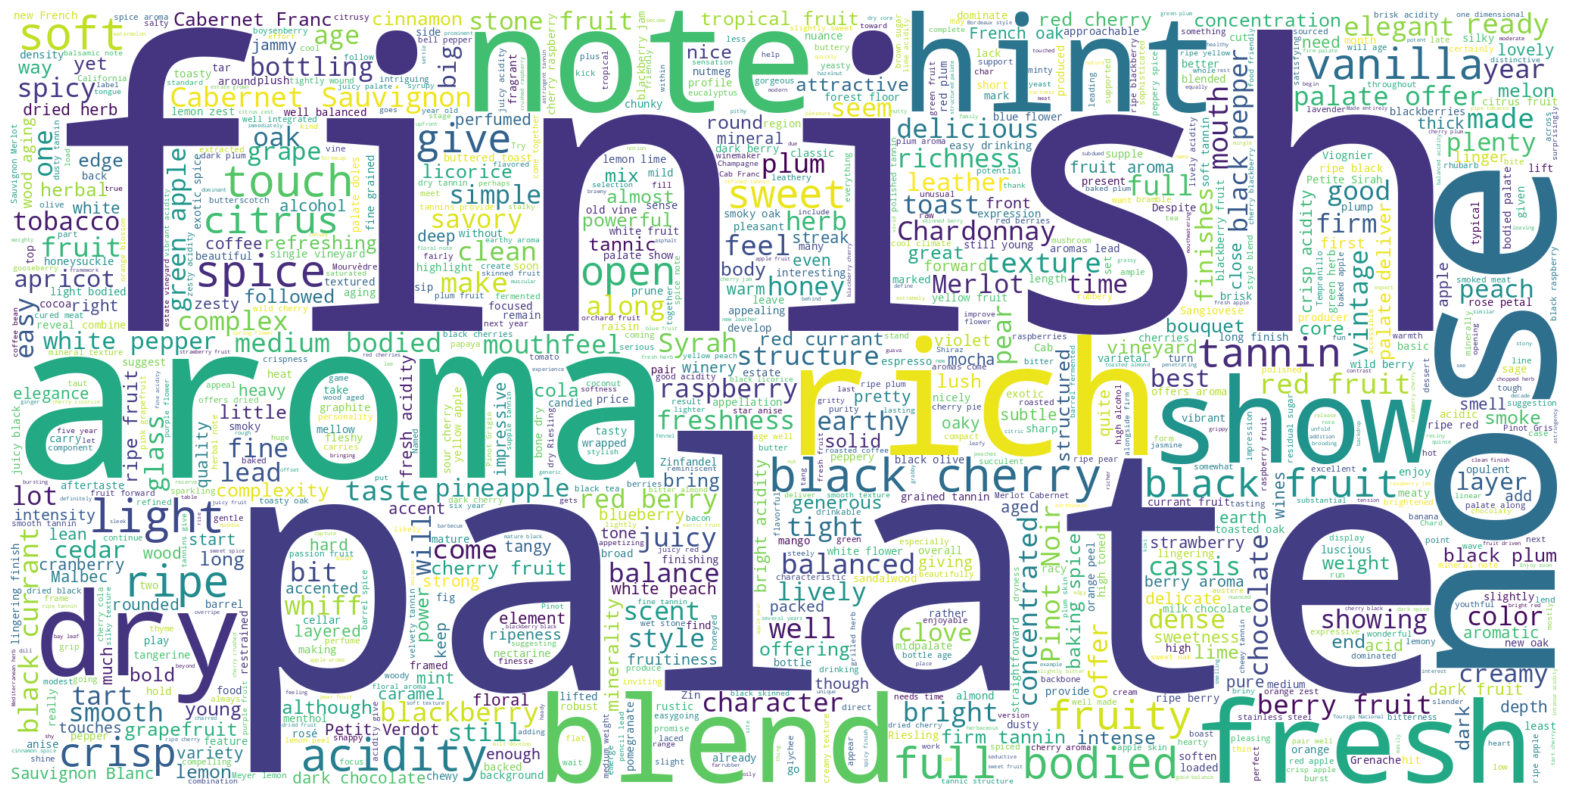

In [39]:
plt.figure(figsize=(20, 18))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")

## **Conclusão**

- **De onde vem o melhor vinho ?**

  R.: A Inglaterra se destaca pela média de vinhos de alta qualidade, mas países como França, Itália, EUA, Portugal e Austrália também oferecem garrafas com a avaliação máxima de 100 pontos.

- **O preço do vinho está relacionado com a qualidade ?**

  R.: O preço frequentemente reflete a qualidade, mas é possível encontrar vinhos a partir de `$4` com pontuação apenas 3 pontos abaixo de garrafas que custam `$3.300`.

- **Certas variedades de uvas são de maior qualidade ?**

  R.: As variedades de uvas estão em um nível semelhante, mas de acordo com os dados, Pinot Noir é destaque.

- **Qual é o melhor vinho em cada faixa de preço ?**

  R.: Seria interessante analisar algumas características, pois durante as análises encontramos vinhos perfeitos para cada orçamento, com alguns destaques.

- **Que palavras são mais utilizadas para descrever um vinho ?**

  R.: Na nuvem de palavras, termos como "finish" e "palate" são mais utilizadas nas descrições, mas "aroma" e "rich" são frequentes também.

- **Qual o país que oferece o melhor custo-benefício, ou seja, maior pontuação pelo menor preço?**

  R.: De acordo com a análise, o país que possui o melhor custo-benefício é a França, atingindo a pontuação máxima pelo menor preço. Abaixo fiz um código que filtra vinhos cuja pontuação é maior ou igual a 100, depois faz a contagem de quantidade de vinhos por país, exibindo o top 10, na qual França está na liderança.

- **Quais descrições estão relacionadas aos vinhos com a pontuação entre 98 e 100 pontos? Considerada a mais alta na Escala de pontuação de vinhos da Wine Enthusiast**

  R.: Na nuvem de palavras, palavras como "fruit" e "tannin" são mais utilizadas nas descrições, mas "year" e "ripe" também. Podemos observar essa afirmação no código fornecido abaixo.

- **Quais descrições estão relacionadas aos vinhos com a pontuação entre 80 e 82 pontos? Considerada a mais baixa na Escala de pontuação de vinhos da Wine Enthusiast**

  R.: Na nuvem, descrições como "finish" e "aroma" lideram a quantidade de citações em vinhos de baixa pontuação. Podemos observar essa afirmação no código fornecido abaixo.




Respondendo a pergunta: **Qual o país que oferece o melhor custo-benefício, ou seja, maior pontuação pelo menor preço?**

In [40]:
high_scoring_wines = df1[df1["points"] >= 100]
top_producers = high_scoring_wines["country"].value_counts()[:10]
top_producers

country
France       8
Italy        4
US           4
Portugal     2
Australia    1
Name: count, dtype: int64

Respondendo a pergunta: **Quais descrições estão relacionadas aos vinhos com a pontuação entre 98 e 100 pontos? Considerada a mais alta na Escala de pontuação de vinhos da Wine Enthusiast**

(-0.5, 2047.5, 1023.5, -0.5)

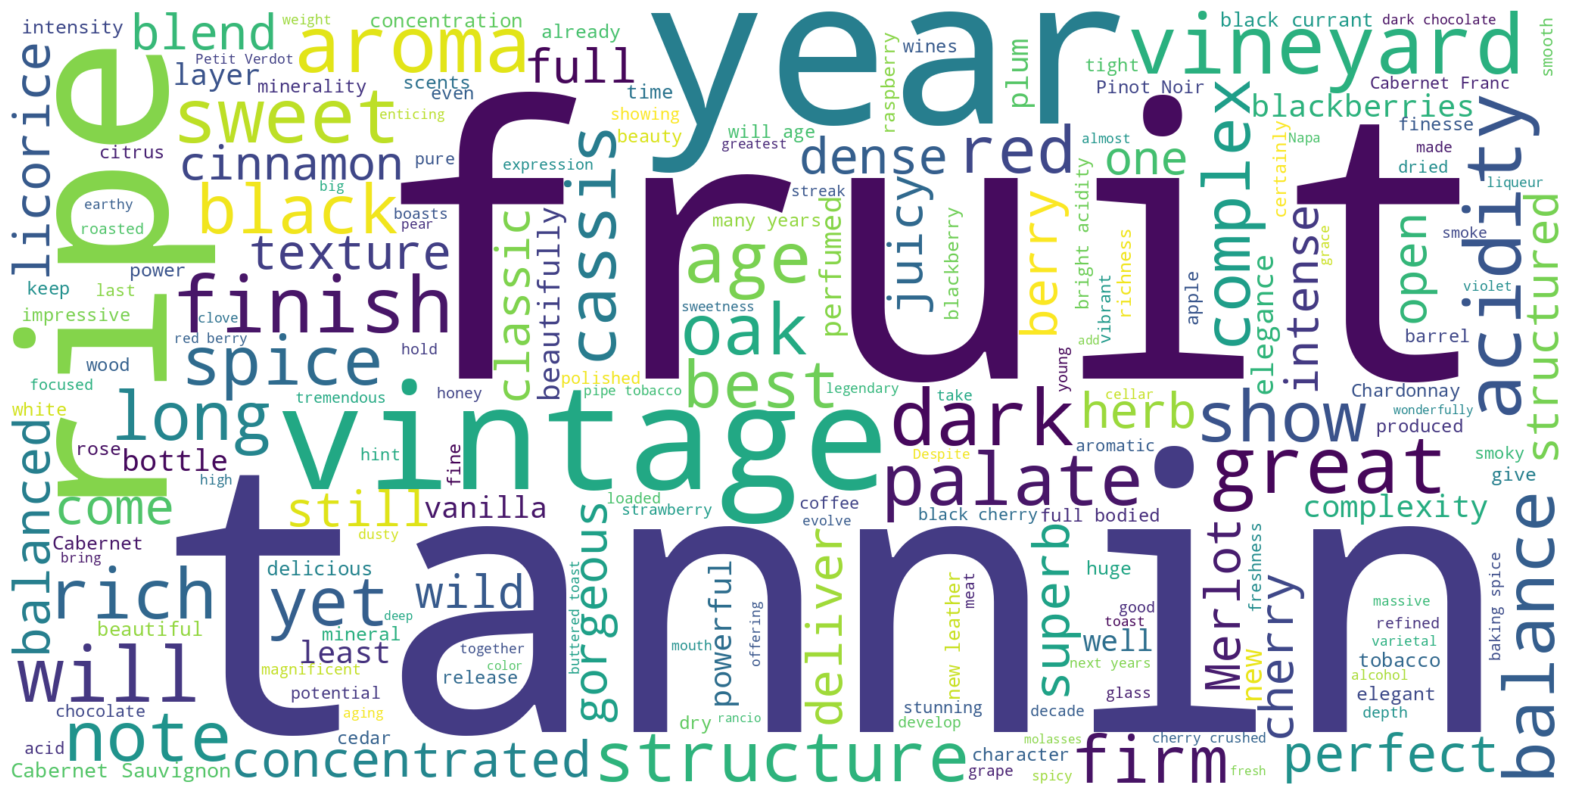

In [41]:
high_scoring_wines = df1[(df1["points"] >= 98) & (df1["points"] <= 100)]

stopwords = set(STOPWORDS)
stopwords.update(["wine", "flavor", "flavors", "drink", "now"])

high_score_text = " ".join(description for description in high_scoring_wines["description"])

high_score_wordcloud = WordCloud(stopwords=stopwords,
                      background_color="white",
                      width=2048,
                      height=1024).generate(high_score_text)

plt.figure(figsize=(20, 18))
plt.imshow(high_score_wordcloud, interpolation='bilinear')
plt.axis('off')

Respondendo a pergunta: **Quais descrições estão relacionadas aos vinhos com a pontuação entre 80 e 82 pontos? Considerada a mais baixa na Escala de pontuação de vinhos da Wine Enthusiast**

(-0.5, 2047.5, 1023.5, -0.5)

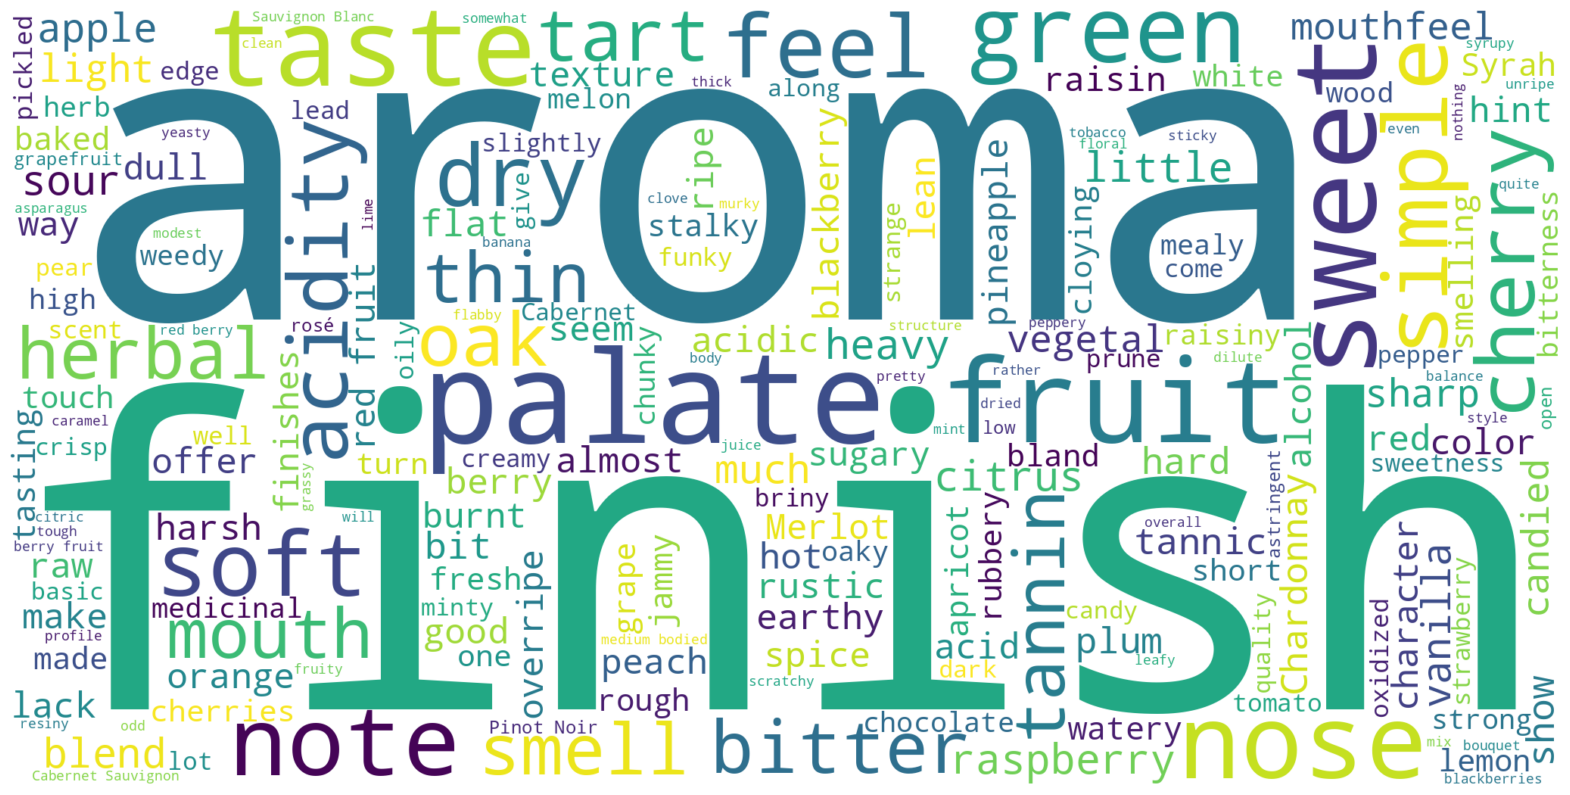

In [42]:
high_scoring_wines = df1[(df1["points"] >= 80) & (df1["points"] <= 82)]

stopwords = set(STOPWORDS)
stopwords.update(["wine", "flavor", "flavors", "drink", "now"])

high_score_text = " ".join(description for description in high_scoring_wines["description"])

high_score_wordcloud = WordCloud(stopwords=stopwords,
                      background_color="white",
                      width=2048,
                      height=1024).generate(high_score_text)

plt.figure(figsize=(20, 18))
plt.imshow(high_score_wordcloud, interpolation='bilinear')
plt.axis('off')